In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd/gdrive/MyDrive/Rice leaf disease detection/

/gdrive/MyDrive/Rice leaf disease detection


In [4]:
ls

'Bacterial leaf blight'/  'Brown spot'/  'Leaf smut'/


In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [6]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [31]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=50
CHANNELS=3

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/gdrive/MyDrive/Rice leaf disease detection",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 120 files belonging to 3 classes.


In [10]:
class_names = dataset.class_names
class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [11]:
len(dataset)

2

In [12]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(62, 256, 256, 3)
tf.Tensor(
[[[234.87845 229.87845 223.87845]
  [236.66542 227.66542 222.66542]
  [237.      228.      223.     ]
  ...
  [238.83984 231.83984 225.33594]
  [238.      231.      225.     ]
  [237.25195 230.25195 224.25195]]

 [[234.39122 229.39122 223.39122]
  [237.41779 228.41779 223.41779]
  [237.      228.      223.     ]
  ...
  [238.14352 231.14352 223.14352]
  [239.      232.      226.     ]
  [238.      231.      225.     ]]

 [[235.      230.      224.     ]
  [236.14359 227.14359 222.14359]
  [236.56482 227.56482 222.56482]
  ...
  [238.25977 231.25977 223.25977]
  [239.      232.      226.     ]
  [236.61687 229.61687 221.61687]]

 ...

 [[237.22266 228.60579 218.83952]
  [238.48047 231.74023 221.2207 ]
  [237.43518 228.87036 219.     ]
  ...
  [235.32812 228.32812 222.32812]
  [236.      227.      220.     ]
  [236.25781 227.77734 221.03711]]

 [[237.75586 229.27344 219.23828]
  [237.07971 231.82635 223.24414]
  [238.      229.      220.     ]
  ...
  [235.17

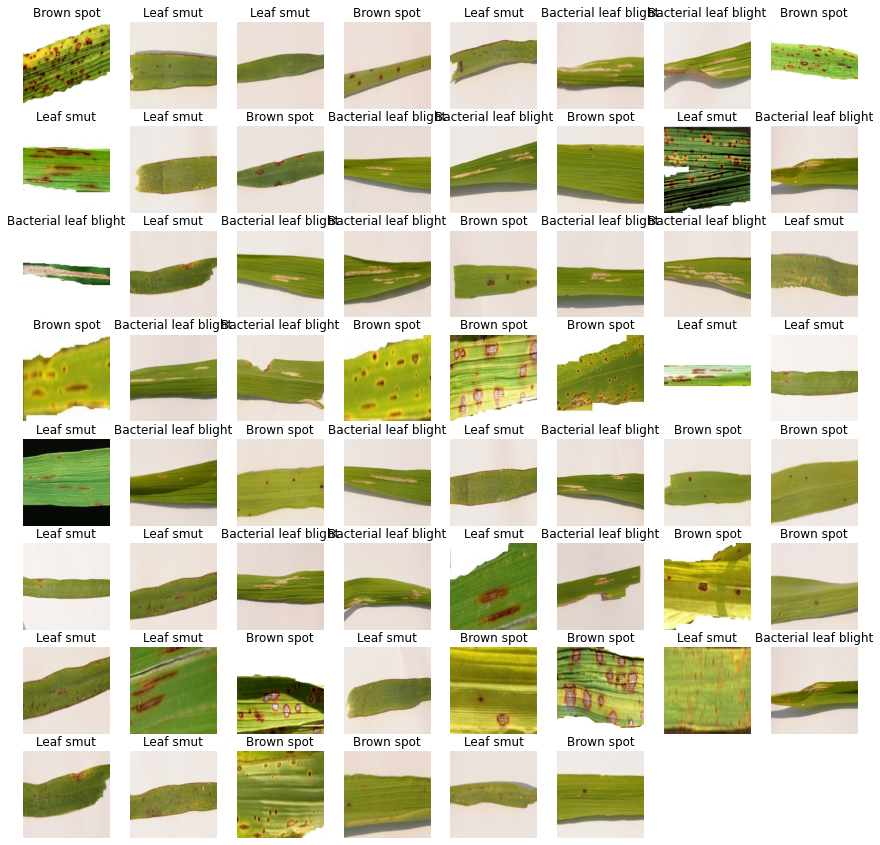

In [13]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [17]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [18]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [19]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (62, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (62, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (62, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (62, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (62, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (62, 60, 60, 64)         

In [32]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 0.9780 - accuracy: 0.5517
Epoch 2/50
1/1 [==============================] - 6s 6s/step - loss: 0.9625 - accuracy: 0.4828
Epoch 3/50
1/1 [==============================] - 6s 6s/step - loss: 0.9295 - accuracy: 0.5862
Epoch 4/50
1/1 [==============================] - 6s 6s/step - loss: 0.9269 - accuracy: 0.4828
Epoch 5/50
1/1 [==============================] - 6s 6s/step - loss: 0.9280 - accuracy: 0.6034
Epoch 6/50
1/1 [==============================] - 6s 6s/step - loss: 1.0380 - accuracy: 0.4655
Epoch 7/50
1/1 [==============================] - 6s 6s/step - loss: 1.0009 - accuracy: 0.3966
Epoch 8/50
1/1 [==============================] - 6s 6s/step - loss: 0.8555 - accuracy: 0.5690
Epoch 9/50
1/1 [==============================] - 6s 6s/step - loss: 0.9357 - accuracy: 0.5517
Epoch 10/50
1/1 [==============================] - 6s 6s/step - loss: 0.8278 - accuracy: 0.6897
Epoch 11/50
1/1 [==============================] 

In [33]:
model.evaluate(test_ds)

1/1 [==============================] - 2s 2s/step - loss: 0.7014 - accuracy: 0.8448


[0.7013615965843201, 0.8448275923728943]

In [34]:
acc = history.history['accuracy']
loss = history.history['loss']

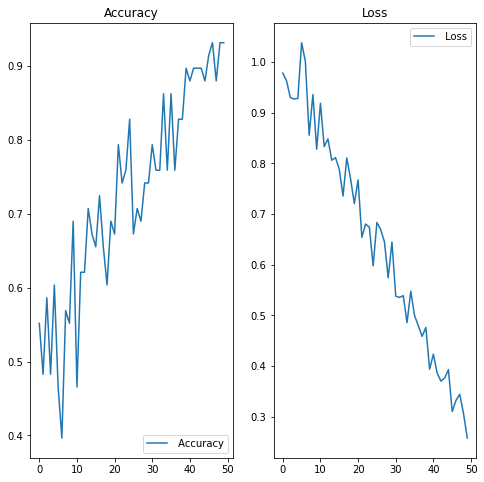

In [35]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

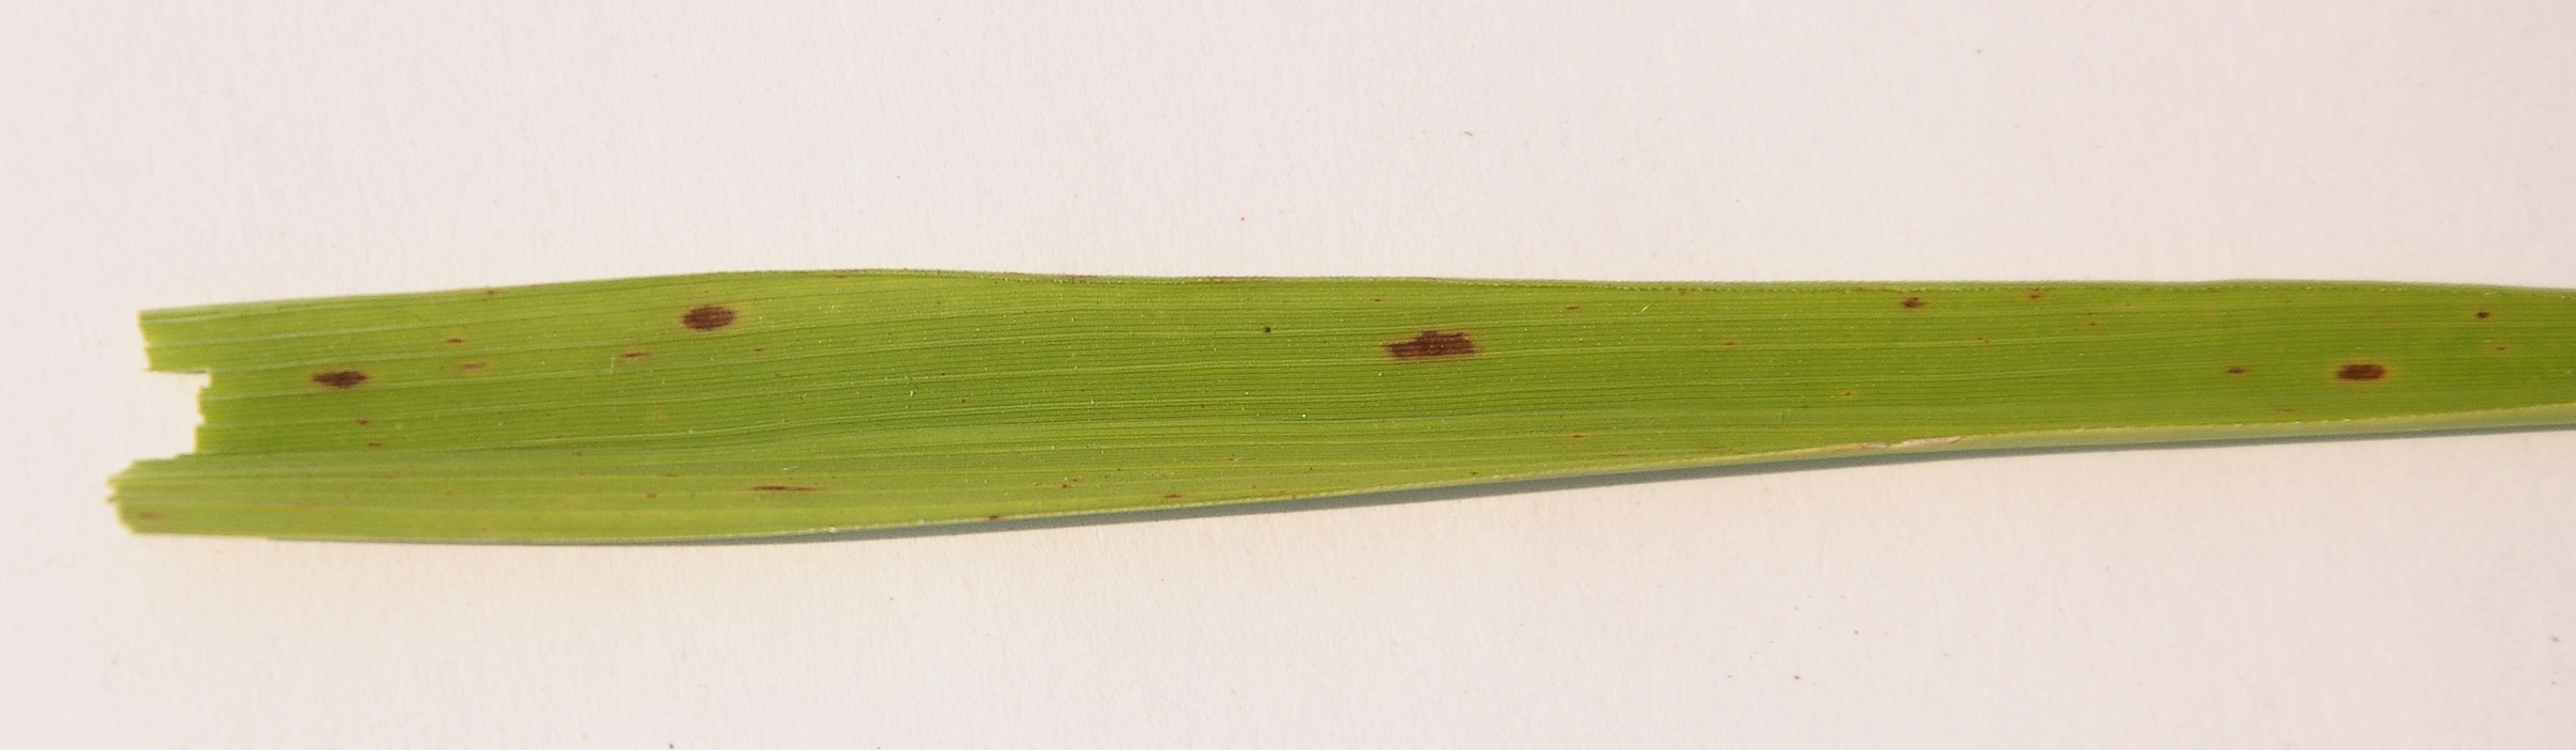

In [36]:
image_path = "/gdrive/My Drive/DSC_0337.JPG"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [37]:
pred = model.predict(scaled_img)

In [38]:
output = class_names[np.argmax(pred)]

In [39]:
output

'Leaf smut'

In [40]:
model.save("Rice leaf disease detection.h5")